<a href="https://colab.research.google.com/github/hsym-uec/myWeb_github/blob/main/Simmple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# SoftBank Stock data from Stooq.com 
# reference https://seanmemo.com/234/

from pandas_datareader import data
start = '2023-01-01'
end = '2023-04-18'
df = data.DataReader('AAPL.US', 'stooq', start, end)

In [14]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-18,166.100,167.4100,165.65,166.47,49923008
2023-04-17,165.090,165.3900,164.03,165.23,41516217
2023-04-14,164.590,166.3200,163.82,165.21,49386480
2023-04-13,161.630,165.8000,161.42,165.56,68445649
2023-04-12,161.220,162.0600,159.78,160.10,50133062
...,...,...,...,...,...
2023-01-09,130.465,133.4100,129.89,130.15,70790813
2023-01-06,126.010,130.2900,124.89,129.62,87754715
2023-01-05,127.130,127.7700,124.76,125.02,80962708


<Figure size 432x288 with 0 Axes>

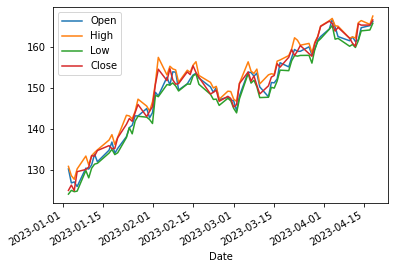

In [3]:
import matplotlib.pyplot as plt
plt.figure()
df[['Open', 'High', 'Low', 'Close']].plot()
plt.show()

In [20]:
df["Ave_High_Low"] = (df["High"] + df["Low"]) / 2
df["Ave_Open_Close"] = (df["Open"] - df["Close"]) / 2
df

,Open,High,Low,Close,Volume,Ave_High_Low,Ave_Open_Close
Date,,,,,,,
2023-04-18,166.100,167.4100,165.65,166.47,49923008,166.53000,-0.1850
2023-04-17,165.090,165.3900,164.03,165.23,41516217,164.71000,-0.0700
2023-04-14,164.590,166.3200,163.82,165.21,49386480,165.07000,-0.3100
2023-04-13,161.630,165.8000,161.42,165.56,68445649,163.61000,-1.9650
2023-04-12,161.220,162.0600,159.78,160.10,50133062,160.92000,0.5600
...,...,...,...,...,...,...,...
2023-01-09,130.465,133.4100,129.89,130.15,70790813,131.65000,0.1575
2023-01-06,126.010,130.2900,124.89,129.62,87754715,127.59000,-1.8050
2023-01-05,127.130,127.7700,124.76,125.02,80962708,126.26500,1.0550


In [19]:
df.iloc[::-1].diff()

,Open,High,Low,Close,Volume,Ave_High_Low,Ave_Open_Close
Date,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,-3.390,-2.2443,0.91,1.29,-23003838.0,-0.66715,-2.3400
2023-01-05,0.240,-0.8857,-0.32,-1.34,-8150925.0,-0.60285,0.7900
2023-01-06,-1.120,2.5200,0.13,4.60,6792007.0,1.32500,-2.8600
2023-01-09,4.455,3.1200,5.00,0.53,-16963902.0,4.06000,1.9625
...,...,...,...,...,...,...,...
2023-04-12,-1.130,-0.3000,-0.73,-0.70,2488845.0,-0.51500,-0.2150
2023-04-13,0.410,3.7400,1.64,5.46,18312587.0,2.69000,-2.5250
2023-04-14,2.960,0.5200,2.40,-0.35,-19059169.0,1.46000,1.6550
